# Predicting Diabetes Patient Readmission

# Background
It was reported that in 2011 more than 3.3 million patients were readmitted in the US within 30 days of being ### discharged, and they were associated with about 
41 billion in hospital costs. The need for readmission indicates that inadequate care #### was provided to the #### patient at the time of first admission. The readmission rate has become an important metric measuring the overall quality of a hospital.

Diabetes is the 7th leading cause of death and affects about 23.6 million people in the US. 1.4 million Americans are diagnosed with diabetes every year. Hospital readmission being a major concern in diabetes care, over 250 million dollars was spent on treatment of readmitted diabetic patients in 2011. Early identification of patients facing a high risk of readmission can enable healthcare providers to conduct additional investigations and possibly prevent future readmissions.

# Dataset Description
The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes 50 features representing 101766 diabetes patients and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria:

It is an inpatient encounter (a hospital admission).
It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
The length of stay was at least 1 day and at most 14 days.
Laboratory tests were performed during the encounter.
Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

Source: UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

# Goal
In this project, I build a machine learning classifier model to predict diabetes patients with high risk of readmission. Note that higher sensitivity (recall) is more desirable for hospitals because it is more crucial to correctly identify "high risk" patients who are likely to be readmitted than identifying "low risk" patients.

In this project I will demonstrate how to build a model to predict hospital readmission for patients with diabetes. The project is built in Python using the following steps

-data exploration

-feature engineering

-building training/validation/test samples

-model selection

-model evaluation

#### Project Definition

Predict if a patient with diabetes will be readmitted to the hospital within 30 days.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import statsmodels.api as sm

## Load the dataset


In [2]:
# load the csv file
df = pd.read_csv('data\diabetic_data.csv')

In [3]:
print('Number of samples:',len(df))

Number of samples: 101766


### Overview of the dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
#print(dataoriginal.info())
print(df.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [6]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


There is some missing data that are represented with ?. We will deal with this in the feature engineering section.

The most important column here is readmitted, which tells us if a patient was hospitalized within 30 days, greater than 30 days or not readmitted.

In [4]:
df.groupby('readmitted').size()


readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

Text(0, 0.5, 'Count')

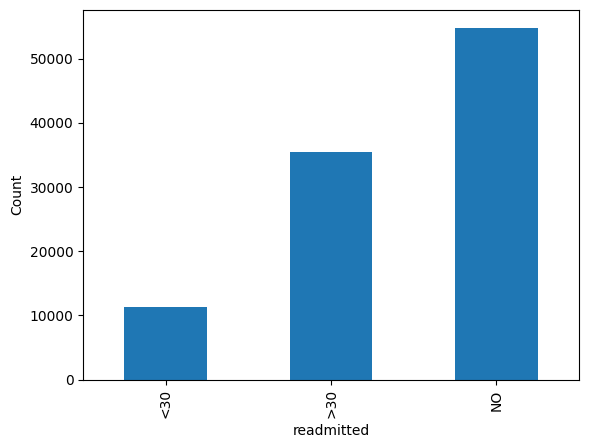

In [8]:
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count') 

In [16]:
df.groupby('num_lab_procedures').size()

num_lab_procedures
1      3208
2      1101
3       668
4       378
5       286
       ... 
120       1
121       1
126       1
129       1
132       1
Length: 118, dtype: int64

Too many groups in number of lab procedures. Plot first 15 groups. 

C:\Users\kumarth\AppData\Local\Temp\ipykernel_6176\4104226682.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df.groupby('num_lab_procedures').size()[:15].plot(kind='bar')


<AxesSubplot: xlabel='num_lab_procedures'>

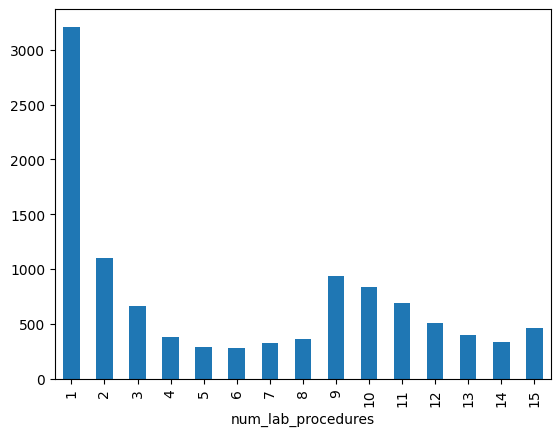

In [14]:
df.groupby('num_lab_procedures').size()[:15].plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

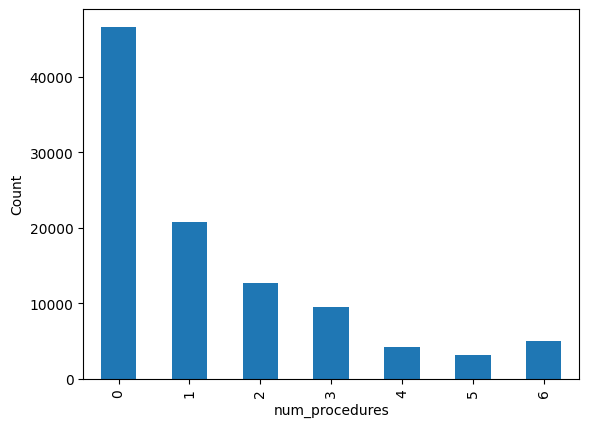

In [11]:
df.groupby('num_procedures').size().plot(kind='bar')
plt.ylabel('Count') 

In [12]:

df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

If we look at the IDs_mapping.csv we can see that 11,13,14,19,20,21 are related to death or hospice.

We should remove these samples from the predictive model.

In [5]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]
len(df)

99343

In [21]:
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
12        3
15       63
16       11
17       14
18     3691
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [22]:
len(df.columns)

50

## Data Preparation Summary


Recategorize 'age' feature

Reduce levels in 'discharge_disposition_id', 'admission_source_id', and 'admission_type_id'

One-hot-encode on categorical data

Square root transform on right skewed count data

Apply feature standardizing on numerical data

Now let's define an output variable for our binary classification. Here we will try to predict if a patient is likely to be re-admitted within 30 days of discharge

In [6]:
df['OUTPUT_LABEL'] = (df.readmitted == '<30').astype('int')

In [24]:
len(df.columns)

51

In [25]:
df.groupby('OUTPUT_LABEL').size()

OUTPUT_LABEL
0    88029
1    11314
dtype: int64


Let's define a function to calculate the prevalence of population that is readmitted with 30 days.

In [7]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [8]:
df['OUTPUT_LABEL'].values

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
print('Prevalence:%.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

Prevalence:0.114


Around 11% of the population is rehospitalized. This makes it an imbalanced classification problem.

Let's see how to address the imbalance in data. To begin with, let's inspect data in each column in the dataset by looking at them in groups of 10.

In [31]:
df[list(df.columns)[:10]].head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1


In [32]:
df[list(df.columns)[10:20]].head()

,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2
0,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?
1,?,?,59,0,18,0,0,0,276,250.01
2,?,?,11,5,13,2,0,1,648,250
3,?,?,44,1,16,0,0,0,8,250.43
4,?,?,51,0,8,0,0,0,197,157


In [33]:
df[list(df.columns)[20:30]].head()

,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide
0,?,1,None,None,No,No,No,No,No,No
1,255,9,None,None,No,No,No,No,No,No
2,V27,6,None,None,No,No,No,No,No,No
3,403,7,None,None,No,No,No,No,No,No
4,250,5,None,None,No,No,No,No,No,No


In [34]:
df[list(df.columns)[30:40]].head()

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide
0,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No
2,Steady,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No
4,Steady,No,No,No,No,No,No,No,No,No


In [9]:
df[list(df.columns)[40:]].head()

,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,OUTPUT_LABEL
0,No,No,No,No,No,No,No,No,No,NO,0
1,No,Up,No,No,No,No,No,Ch,Yes,>30,0
2,No,No,No,No,No,No,No,No,Yes,NO,0
3,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


From this, we see that there are a lot of categorical (non-numeric) variables. Note that the variables with _id are also categorical and you can see what the ids refer to with the IDs_mapping.csv. Let's take a look at the unique values for each column.

In [29]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

encounter_id: 99343 unique values
patient_nbr: 69990 unique values
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5  7 10  4 18  8 12 16 17 22 23  9 15 24 28 27]
admission_source_id
[ 1  7  2  4  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient: 39 unique values
number_emergency: 33 unique values
number_inpatient
[ 0  1  2  3  6 

From analysis of the columns, we can see there are a mix of categorical (non-numeric) and numerical data. A few things to point out,

- encounter_id and patient_nbr: these are just identifiers and not useful variables for this model.
- age and weight: are categorical in this data set
- admission_type_id,discharge_disposition_id,admission_source_id: are numerical here, but are IDs (see IDs_mapping). They should be considered categorical. 
- examide and citoglipton only have 1 value, so we will not use these variables
- diag1, diag2, diag3 - are categorical and have a lot of values. We will not use these as part of this project, but you could group these ICD codes to reduce the dimension. We will use number_diagnoses to capture some of this information. 
- medical_speciality - has many categorical variables, so we should consider this when making features. 

In [36]:
(df.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

## Feature Engineering
In this section, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical features, categorical features and extra features.

In this data set, the missing numbers were filled with a question mark. Let's replace it with a nan representation.

In [10]:

# replace ? with nan
df = df.replace('?',np.nan)

## Numerical Features¶
The easiest type of features to use is numerical features. These features do not need any modification. The columns that are numerical that we will use are shown below

In [39]:
print(df.select_dtypes(include=['number']).columns)

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'OUTPUT_LABEL'],
      dtype='object')


encounter_id and patient_nbr are identifiers that are not useful for the model. admission_type_id,discharge_disposition_id,admission_source_id are numerical IDs assigned to the descriptions (see IDs_mapping). They should be considered categorical.

In [11]:
cols_num = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

Let's check if there are any missing values in the numerical data.

In [12]:
(df[cols_num].isnull().sum())

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

## Categorical Features
The next type of features we want to create are categorical variables. Categorical variables are non-numeric data such as race and gender. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below.

The first set of categorical data we will deal with are these columns:

In [13]:
cols_cat = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','payer_code','medical_specialty']


Let's check if there are any missing data

In [43]:
(df[cols_cat].isnull().sum())

race                         2234
gender                          0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
payer_code                  39398
medical_specialty           48616
dtype: int64


race, payer_code, and medical_specialty have missing data. Since these are categorical data, the best thing to do is to just add another categorical type for unknown using the fillna function

Create separate category for features with Nan as 'UNK'

In [14]:

df['race'] = df['race'].fillna('UNK')
df['payer_code'] = df['payer_code'].fillna('UNK')
df['medical_specialty'] = df['medical_specialty'].fillna('UNK')


Let's investigate medical specialty before we begin.

In [15]:
print('Number medical specialty:', df.medical_specialty.nunique())
num_specialties = df.groupby('medical_specialty').size().sort_values(ascending = False)
print(num_specialties)

Number medical specialty: 73
medical_specialty
UNK                                 48616
InternalMedicine                    14237
Emergency/Trauma                     7419
Family/GeneralPractice               7252
Cardiology                           5279
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Psychiatry-Addictive                    1
Speech                                  1
Length: 73, dtype: int64


We can see that most of them are unknown and that the count drops off pretty quickly. We don't want to add 73 new variables since some of them only have a few samples. As an alternative, we can create a new variable that only has 11 options (the top 10 specialities and then an other category). Obviously, there are other options for bucketing, but this is one of the easiest methods.

In [49]:
num_specialties[:10]

medical_specialty
UNK                           48616
InternalMedicine              14237
Emergency/Trauma               7419
Family/GeneralPractice         7252
Cardiology                     5279
Surgery-General                3059
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Radiologist                    1121
dtype: int64

In [16]:
top_10=['UNK','InternalMedicine','Emergency/Trauma',\
       'Family/GeneralPractice ','Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']
# make a new column with duplicated data
df['med_spec'] = df['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
df.loc[~df.med_spec.isin(top_10),'med_spec'] = 'Other'

In [51]:
df.groupby('med_spec').size()

med_spec
Cardiology                     5279
Emergency/Trauma               7419
InternalMedicine              14237
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Other                         15451
Radiologist                    1121
Surgery-General                3059
UNK                           48616
dtype: int64

To convert our categorical features to numbers, we will use a technique called one-hot encoding. In one-hot encoding, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. For example, for the column race, we would create new columns ('race_Caucasian','race_AfricanAmerican', etc). If the patient's race is Caucasian, the patient gets a 1 under 'race_Caucasian' and 0 under the rest of the race columns. To create these one-hot encoding columns, we can use the get_dummies function.

Now the problem is that if we create a column for each unique value, we have correlated columns. In other words, the value in one column can be figured out by looking at the rest of the columns. For example, if the sample is not AfricanAmerican, Asian, Causasian, Hispance or Other, it must be UNK. To deal with this, we can use the drop_first option, which will drop the first categorical value for each column.

The get_dummies function does not work on numerical data. To trick get_dummies, we can convert the numerical data into strings and then it will work properly.

In [17]:
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

df[cols_cat_num] = df[cols_cat_num].astype('str')

In [18]:
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num + ['med_spec']],drop_first = True)

In [19]:
df_cat.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,...,admission_source_id_9,med_spec_Emergency/Trauma,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


To add the one-hot encoding columns to the dataframe we can use concat function. Make sure to use axis = 1 to indicate add the columns.

In [20]:
df = pd.concat([df,df_cat], axis = 1)

In [21]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,admission_source_id_9,med_spec_Emergency/Trauma,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,0,0,0,0,0,0,1,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,0,0,0,0,0,0,0,0,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,0,0,0,0,0,0,0,0,0,1
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,0,0,0,0,0,0,0,0,0,1
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,0,0,0,0,0,0,0,0,0,1


Save the column names of the categorical data.

In [22]:

cols_all_cat = list(df_cat.columns)
print(cols_all_cat)

['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'race_UNK', 'gender_Male', 'gender_Unknown/Invalid', 'max_glu_serum_>300', 'max_glu_serum_None', 'max_glu_serum_Norm', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'metformin_No', 'metformin_Steady', 'metformin_Up', 'repaglinide_No', 'repaglinide_Steady', 'repaglinide_Up', 'nateglinide_No', 'nateglinide_Steady', 'nateglinide_Up', 'chlorpropamide_No', 'chlorpropamide_Steady', 'chlorpropamide_Up', 'glimepiride_No', 'glimepiride_Steady', 'glimepiride_Up', 'acetohexamide_Steady', 'glipizide_No', 'glipizide_Steady', 'glipizide_Up', 'glyburide_No', 'glyburide_Steady', 'glyburide_Up', 'tolbutamide_Steady', 'pioglitazone_No', 'pioglitazone_Steady', 'pioglitazone_Up', 'rosiglitazone_No', 'rosiglitazone_Steady', 'rosiglitazone_Up', 'acarbose_No', 'acarbose_Steady', 'acarbose_Up', 'miglitol_No', 'miglitol_Steady', 'miglitol_Up', 'troglitazone_Steady', 'tolazamide_Steady', 'tolazamide_Up', 'insulin_No', 'insulin_Steady', 'insul

## Extra features
The last two columns we want to make features are age and weight. Typically, you would think of these as numerical data, but they are categorical in this dataset as shown below.

In [23]:

df[['age', 'weight']].head()

,age,weight
0,[0-10),NaN
1,[10-20),NaN
2,[20-30),NaN
3,[30-40),NaN
4,[40-50),NaN


One option could be to create categorical data as shown above. Since there is a natural order to these values, it might make more sense to convert these to numerical data. Another example when you would want to do this might be size of a t-shirt (small, medium, large). Let's start with age.

In [24]:
df.groupby('age').size()

age
[0-10)        160
[10-20)       690
[20-30)      1649
[30-40)      3764
[40-50)      9607
[50-60)     17060
[60-70)     22059
[70-80)     25331
[80-90)     16434
[90-100)     2589
dtype: int64

Let's map these to 0-9 for the numerical data

In [25]:
age_id={'[0-10)':0,
        '[10-20)':1,
        '[20-30)':2,
        '[30-40)':3,
        '[40-50)':4,
        '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90
            }

In [26]:
df['age_group']=df.age.replace(age_id)

Now let's look at weight. Recall that this feature is not filled out very often.

In [27]:
df.weight.notnull().sum()

3125

Instead of creating an ordinal feature that we did above, let's just create a variable to say if weight was filled out or not. The presence of a variable might be predictive regardless of the value.

In [28]:

df['has_weight'] = df.weight.notnull().astype('int')

In [29]:

cols_extra = ['age_group','has_weight']


## Engineering Features Summary

In [30]:
print('Total number of features:', len(cols_num + cols_all_cat + cols_extra))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))
print('Extra features:',len(cols_extra))

Total number of features: 214
Numerical Features: 8
Categorical Features: 204
Extra features: 2


In [31]:
df[cols_num + cols_all_cat + cols_extra].isnull().sum().sort_values(ascending = False).head(10)

time_in_hospital                                 0
medical_specialty_Psychiatry                     0
medical_specialty_Psychiatry-Child/Adolescent    0
medical_specialty_Psychology                     0
medical_specialty_Pulmonology                    0
medical_specialty_Radiologist                    0
medical_specialty_Radiology                      0
medical_specialty_Resident                       0
medical_specialty_Rheumatology                   0
medical_specialty_Speech                         0
dtype: int64

In [32]:
col2use = cols_num + cols_all_cat + cols_extra
df_data = df[col2use + ['OUTPUT_LABEL']]


# Building Training/Validation/Test Samples
So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into three parts:

- Training samples: these samples are used to train the model
- Validation samples: these samples are held out from the training data and are used to make decisions on how to improve the model
- Test samples: these samples are held out from all decisions and are used to measure the generalized performance of the model

In this project, we will split into 70% train, 15% validation, 15% test.

The first thing I like to do is to shuffle the samples in case there was some order (e.g. all positive samples on top). Here n is the number of data points. random_state is a seed for the random number generator. This allows you to obtain reproducible results when sampling from the DataFrame.

In [33]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)


We can use sample again to extract 30% (using frac) of the data to be used for validation / test splits. It is important that validation and test come from similar distributions and this technique is one way to do it.

In [34]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


And now split into test and validation using 50% fraction

In [35]:
# Save 30% of the data as validation5and test data 
df_test=df_valid_test.sample(frac=0.50,random_state=42)
print('Split size: %.3f'%(len(df_test)/len(df_valid_test)))
df_valid = df_valid_test.drop(df_test.index)

Split size: 0.500


Note that .drop just drops the rows from df_test to get the rows that were not part of the sample. We can use this same idea to get the training data.

In [36]:
#training data set
df_train_all = df_data.drop(df_valid_test.index)

At this point, let's check what percent of our groups are hospitalized within 30 days. This is known as prevalence. Ideally, all three groups would have similar prevalance.

In [37]:
df_data.size

21358745

In [38]:

print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 14902):0.117
Valid prevalence(n = 14901):0.113
Train all prevalence(n = 69540):0.113



The prevalence is about the same for each group.

Let's verify that we used all the data.

In [39]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 99343)


At this point, you might say, drop the training data into a predictive model and see the outcome. However, if we do this, it is possible that we will get back a model that is 89% accurate. Great! Good job! But wait, we never catch any of the readmissions (recall= 0%). How can this happen?

What is happening is that we have an imbalanced dataset where there are much more negatives than positives, so the model might just assigns all samples as negative.

Typically, it is better to balance the data in some way to give the positives more weight. There are 3 strategies that are typically utilized:

- sub-sample the more dominant class: use a random subset of the negatives
- over-sample the imbalanced class: use the same positive samples multiple times
- create synthetic positive data

Usually, you will want to use the latter two methods if you only have a handful of positive cases. Since we have a few thousand positive cases, let's use the sub-sample approach. Here, we will create a balanced training data set that has 50% positive and 50% negative. You can also play with this ratio to see if you can get an improvement.

In [40]:

# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))


Train balanced prevalence(n = 15766):0.500


Since we have done a lot of work, let's save our data.

In [41]:
df_train_all.to_csv('data\df_train_all.csv',index=False)
df_train.to_csv('data\df_train.csv',index=False)
df_valid.to_csv('data\df_valid.csv',index=False)
df_test.to_csv('data\df_test.csv',index=False)


Most machine learning packages like to use an input matrix X and output vector y, so let's create those

In [42]:
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (69540, 214)
Training shapes: (15766, 214) (15766,)
Validation shapes: (14901, 214) (14901,)


Some machine learning models have trouble when the variables are of different size (0-100, vs 0-1000000). To deal with that we can scale the data. Here we will use scikit learn's Standard Scaler which removes the mean and scales to unit variance. Here I will create a scaler using all the training data, but you could use the balanced one if you wanted.

In [43]:
df.groupby('OUTPUT_LABEL').size()


OUTPUT_LABEL
0    88029
1    11314
dtype: int64

In [44]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler()

We will need this scaler for the test data, so let's save it using a package called pickle.

In [142]:
import pickle
scalerfile = 'data\scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [143]:

# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

Now we can transform our data matrices

In [141]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [48]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    #F1_score=precision_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [49]:
thresh = 0.5

# Performing Exploratory Data Analysis (EDA)

### Check for Correlation if any

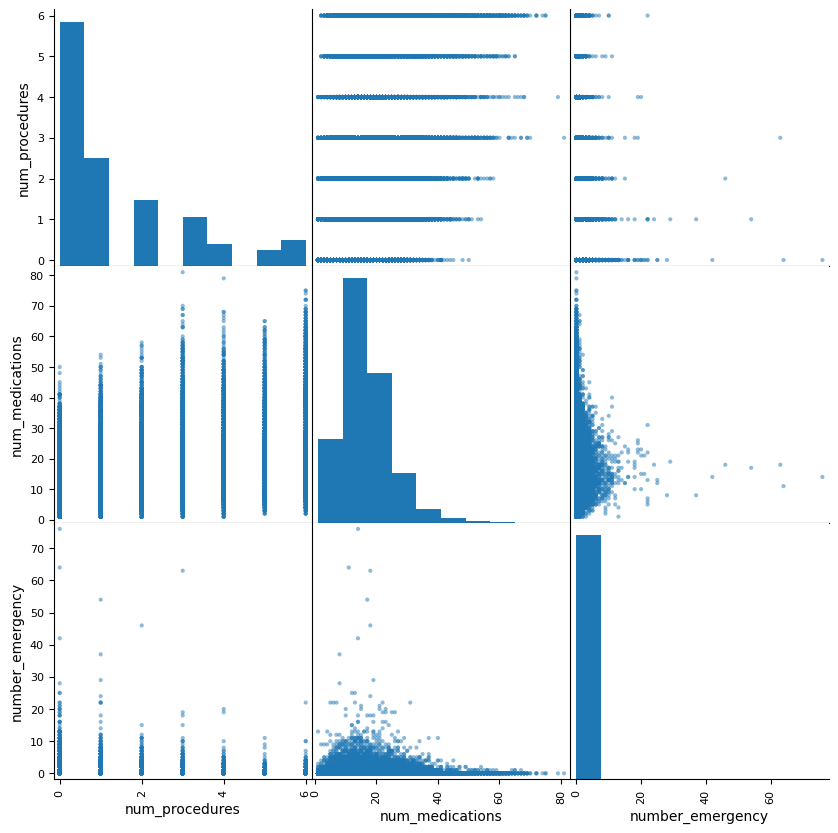

In [50]:
# Let's see the relationship between different variables to understand the data and if there is a strong correlation between 
#two variables then we can consider one of them.
import seaborn as sns
from pandas.plotting import scatter_matrix
sm = scatter_matrix(df[['num_procedures', 'num_medications', 'number_emergency']], figsize = (10, 10))
sns.despine()


From the above, we can see that there is no problem of multi-collinearity. We can also see that as the number_emergency increases the num_medication decreases.

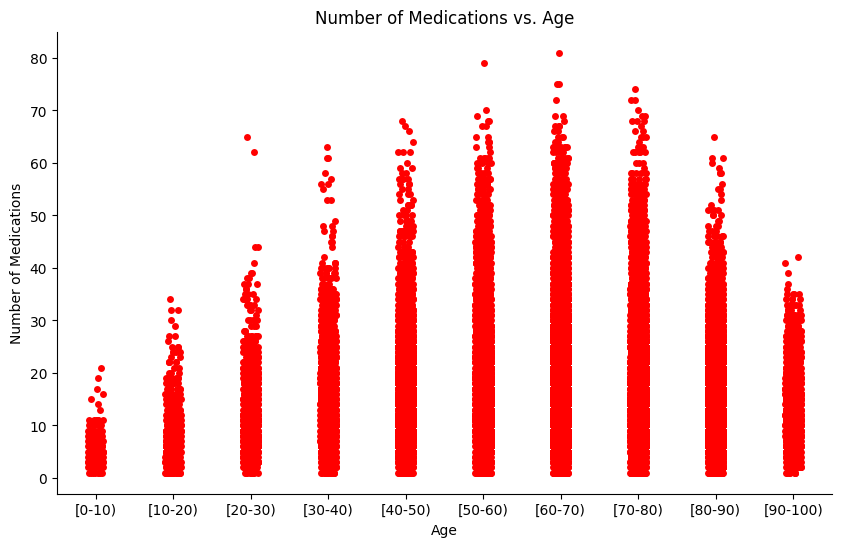

In [51]:
#Let's try to see how the age and number of medicines vary,
sortage = df.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

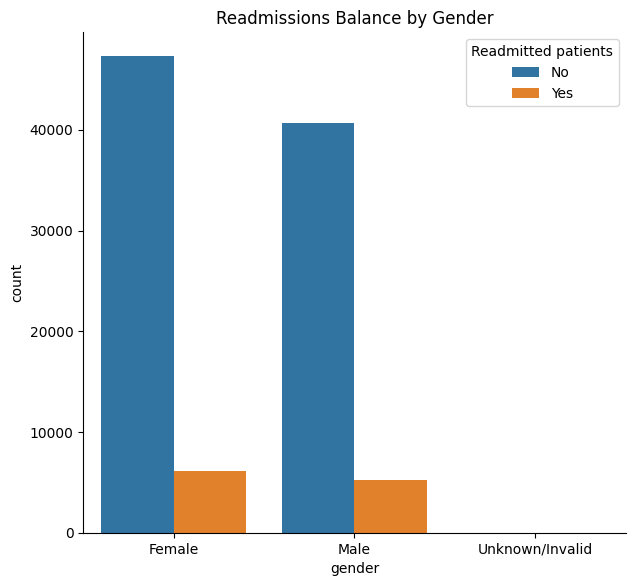

In [52]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'OUTPUT_LABEL' ,data = df) 
sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

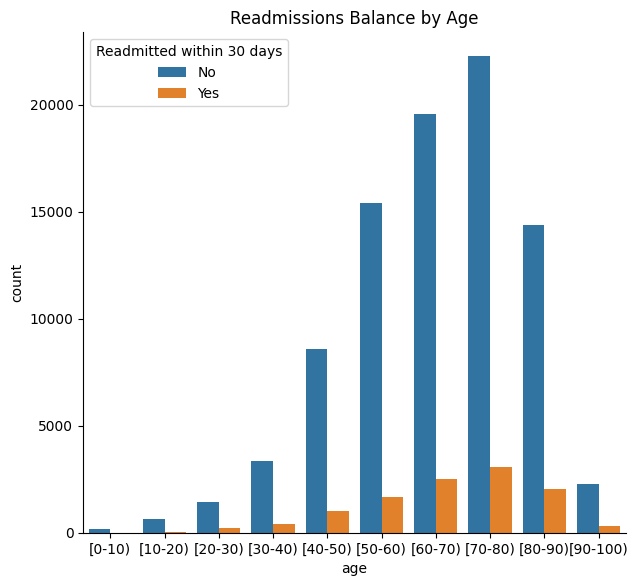

In [53]:

b = df.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = 'OUTPUT_LABEL', data = df, order = b_sort) 

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

<AxesSubplot: xlabel='age', ylabel='count'>

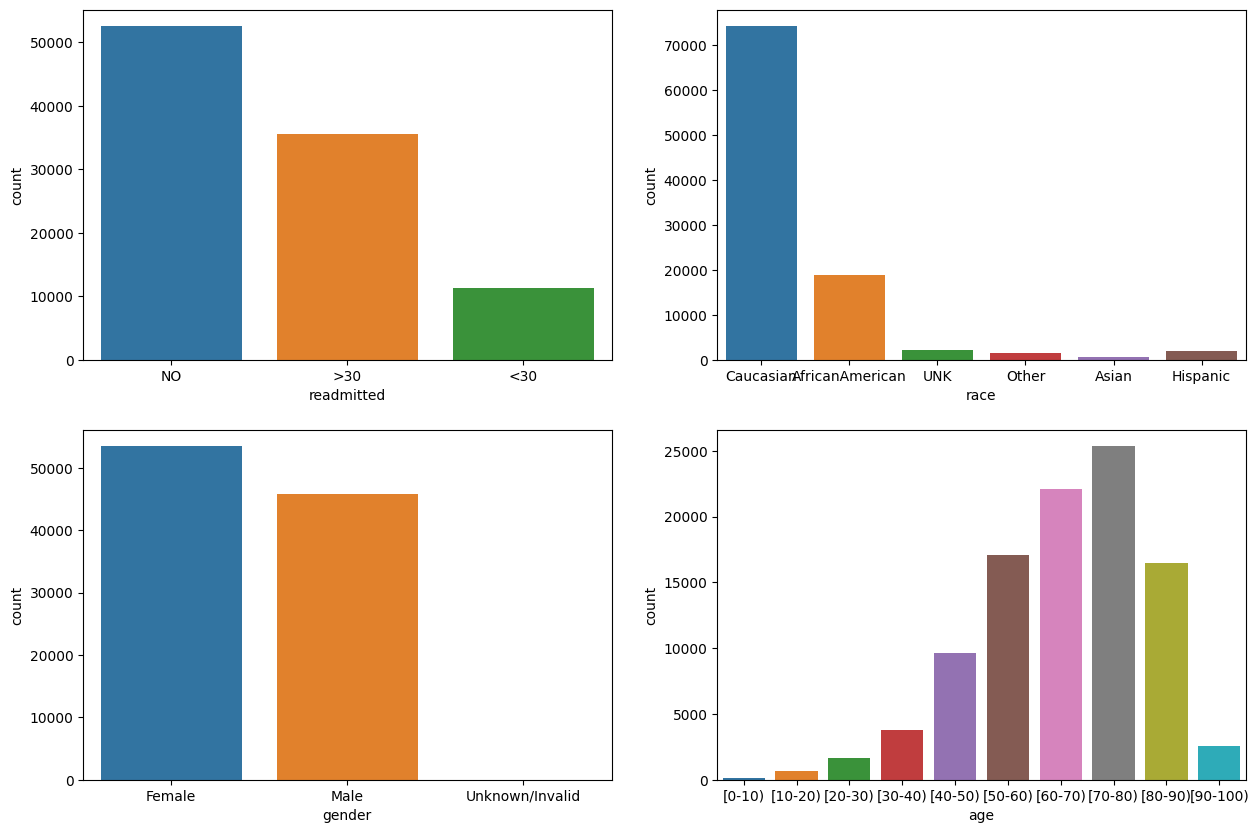

In [54]:
#Exploring the categorical variables,

import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=df, ax=ax[0][0])
sns.countplot(x="race", data=df, ax=ax[0][1])
sns.countplot(x="gender", data=df, ax=ax[1][0])
sns.countplot(x="age", data=df, ax=ax[1][1])

# Model Selection: baseline models¶
In this section, we will compare the performance of different machine learning models using default hyperparameters.

## K nearest neighbors (KNN)

In [55]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(n_neighbors=100)

In [56]:
Y_knn=knn.predict(X_valid_tf)

In [57]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds_knn = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds_knn, thresh)

KNN
Training:
AUC:0.651
accuracy:0.606
recall:0.490
precision:0.638
specificity:0.681
prevalence:0.500
 
Validation:
AUC:0.619
accuracy:0.668
recall:0.462
precision:0.162
specificity:0.656
prevalence:0.113
 


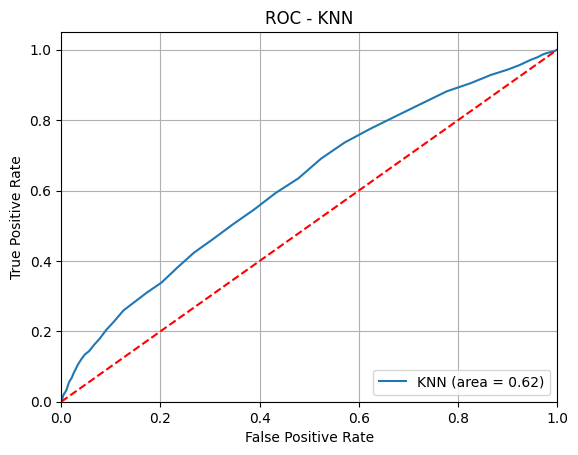

In [58]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_valid, y_valid_preds_knn)
fp_rate, tp_rate, thresholds = roc_curve(y_valid, y_valid_preds_knn)
plt.figure()
plt.plot(fp_rate, tp_rate, label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [59]:
#Printing the confusion matrix,

print(confusion_matrix(y_valid, Y_knn))

[[9177 4039]
 [ 907  778]]


In [60]:
y_valid1=(y_valid>thresh)

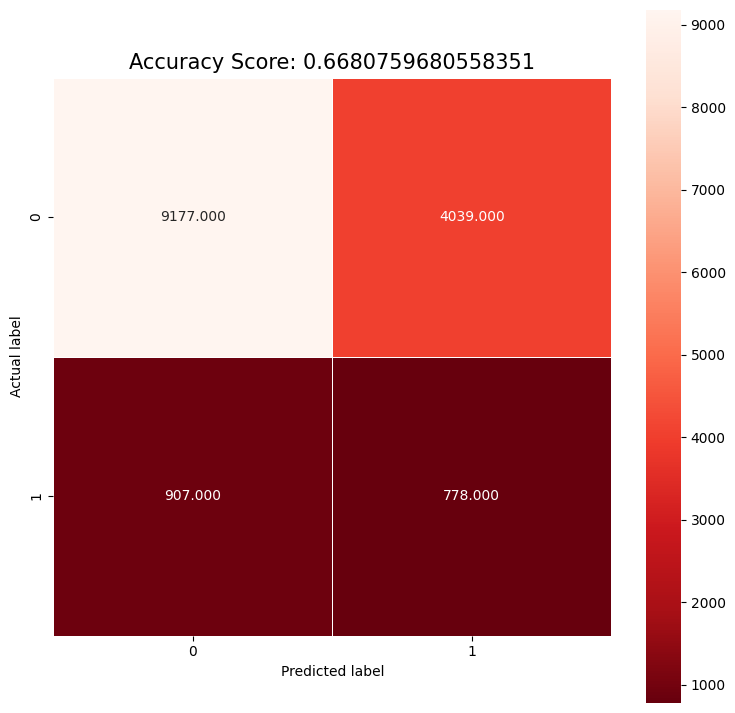

In [61]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_knn), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

In [62]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(y_valid, Y_knn, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.91      0.69      0.79     13216
         YES       0.16      0.46      0.24      1685

    accuracy                           0.67     14901
   macro avg       0.54      0.58      0.51     14901
weighted avg       0.83      0.67      0.73     14901



# Logistic Regression


In [63]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)


c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [64]:
Y_lr=lr.predict(X_valid_tf)

In [65]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds_lr= lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds_lr, thresh)

Logistic Regression
Training:
AUC:0.681
accuracy:0.629
recall:0.566
precision:0.648
specificity:0.692
prevalence:0.500
 
Validation:
AUC:0.661
accuracy:0.659
recall:0.560
precision:0.179
specificity:0.672
prevalence:0.113
 


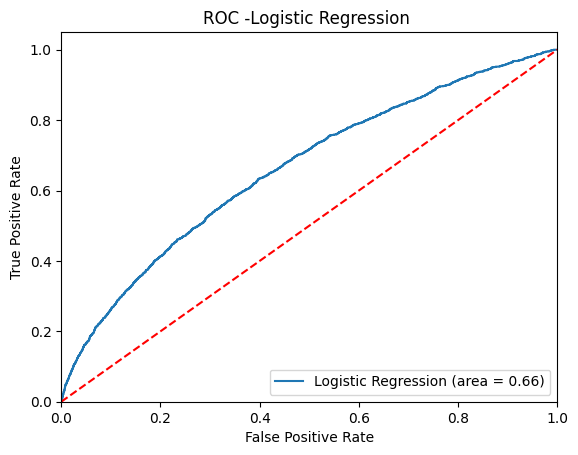

In [66]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_valid, y_valid_preds_lr)
fp_rate, tp_rate, thresholds = roc_curve(y_valid, y_valid_preds_lr)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC -Logistic Regression ')
plt.legend(loc="lower right")
plt.show()

In [67]:
print(confusion_matrix(y_valid, Y_lr))

[[8882 4334]
 [ 741  944]]


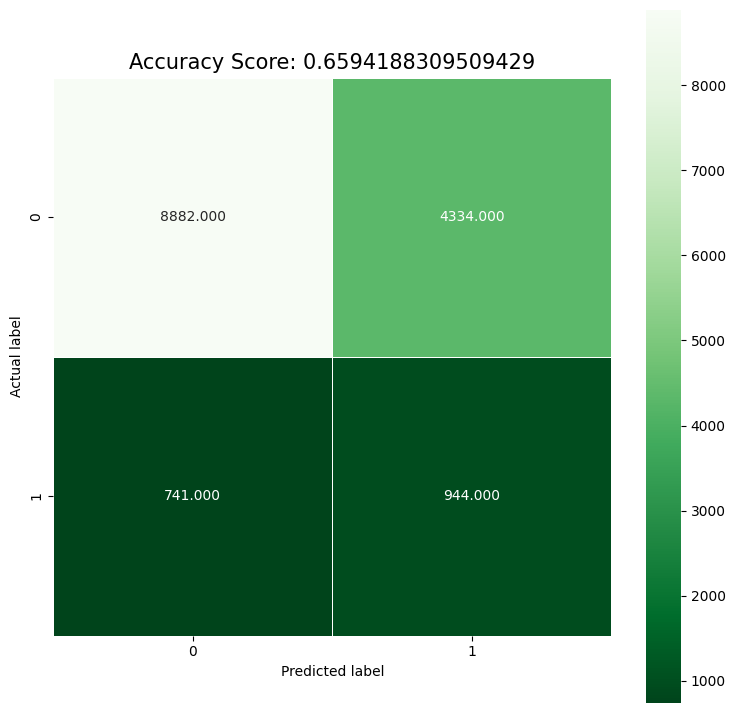

In [68]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_lr), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

 When you have a lot of data logistic regression may take a long time to compute. There is an alternative approach called stochastic gradient descent that works similarly to logistic regression but doesn't use all the data at each iteration.

## Stochastic Gradient Descent Classifier

In [69]:
# stochastic gradient descent
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss='log', random_state=42)
sgdc.fit(X_train_tf, y_train)

c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', random_state=42)

In [70]:
Y_sgdc=sgdc.predict(X_valid_tf)

In [71]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds_sgdc = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds_sgdc, thresh)

Stochastic Gradient Descend
Training:
AUC:0.596
accuracy:0.570
recall:0.533
precision:0.576
specificity:0.607
prevalence:0.500
 
Validation:
AUC:0.586
accuracy:0.588
recall:0.534
precision:0.144
specificity:0.594
prevalence:0.113
 


In [72]:
print(confusion_matrix(y_valid, Y_sgdc))

[[7856 5360]
 [ 786  899]]


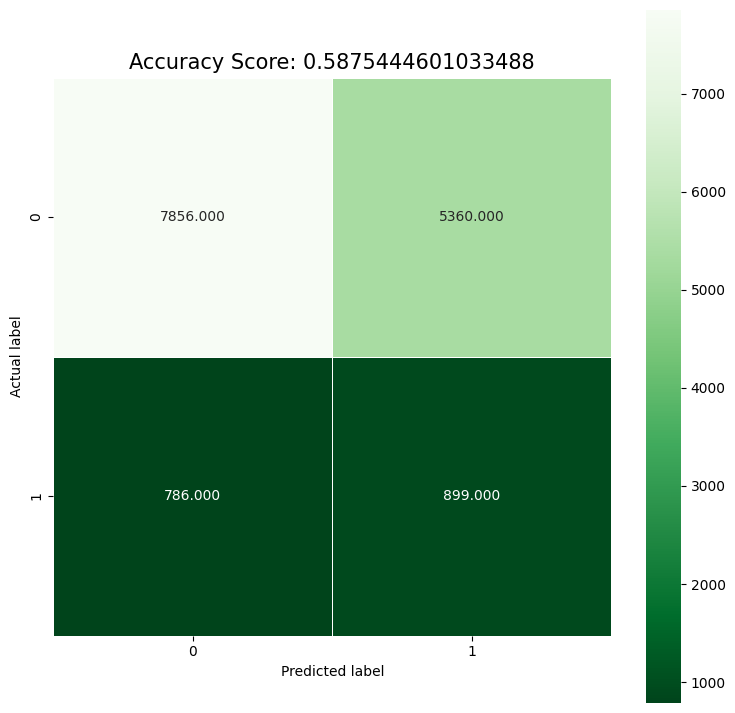

In [73]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_sgdc), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(sgdc.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

# Naive Bayes

In [74]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)


GaussianNB()

In [75]:
Y_nb=nb.predict(X_valid_tf)

In [76]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds_nb = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds_nb, thresh)


Naive Bayes
Training:
AUC:0.513
accuracy:0.511
recall:0.987
precision:0.506
specificity:0.035
prevalence:0.500
 
Validation:
AUC:0.509
accuracy:0.139
recall:0.982
precision:0.114
specificity:0.032
prevalence:0.113
 


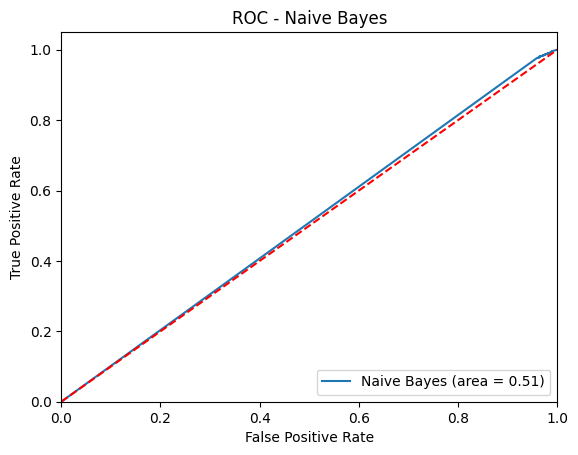

In [77]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_valid, y_valid_preds_nb)
fp_rate, tp_rate, thresholds = roc_curve(y_valid, y_valid_preds_nb)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Naive Bayes (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [78]:
print(confusion_matrix(y_valid, Y_nb))

[[  424 12792]
 [   31  1654]]


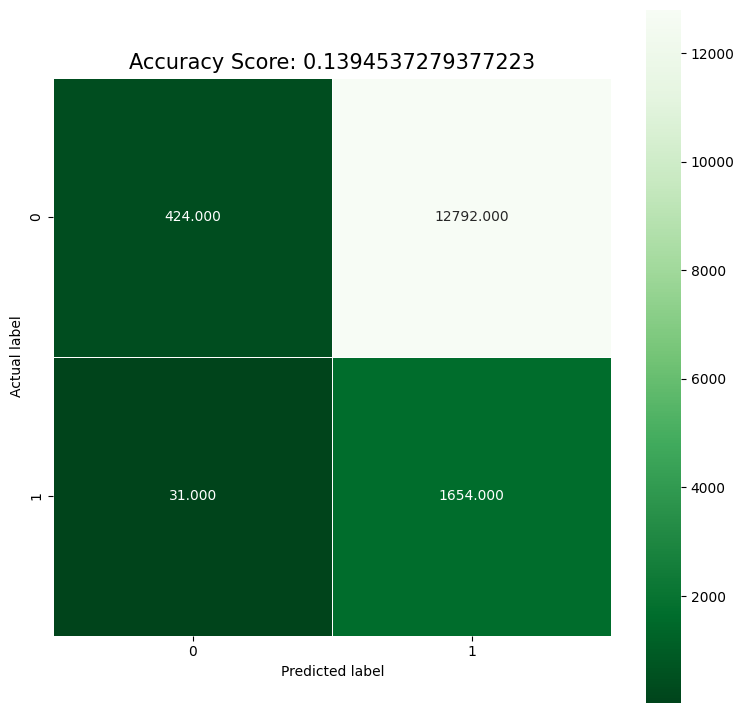

In [79]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_nb), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(nb.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

# Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [81]:
Y_tree=tree.predict(X_valid_tf)

In [82]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds_tree = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds_tree, thresh)

Decision Tree
Training:
AUC:0.734
accuracy:0.669
recall:0.603
precision:0.695
specificity:0.733
prevalence:0.500
 
Validation:
AUC:0.628
accuracy:0.657
recall:0.552
precision:0.176
specificity:0.667
prevalence:0.113
 


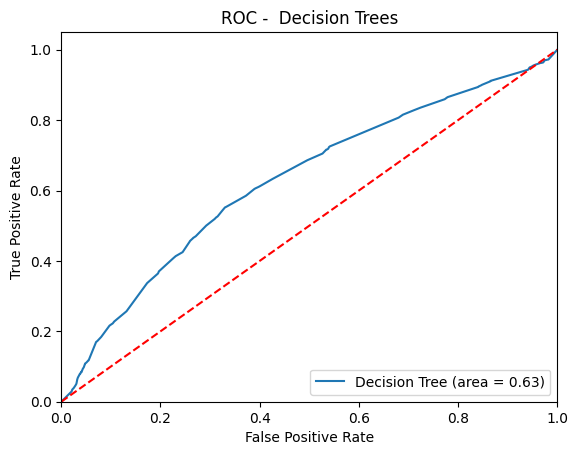

In [83]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_valid, y_valid_preds_tree)
fp_rate, tp_rate, thresholds = roc_curve(y_valid, y_valid_preds_tree)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC -  Decision Trees')
plt.legend(loc="lower right")
plt.show()

In [84]:
print(confusion_matrix(y_valid, Y_tree))

[[8855 4361]
 [ 755  930]]


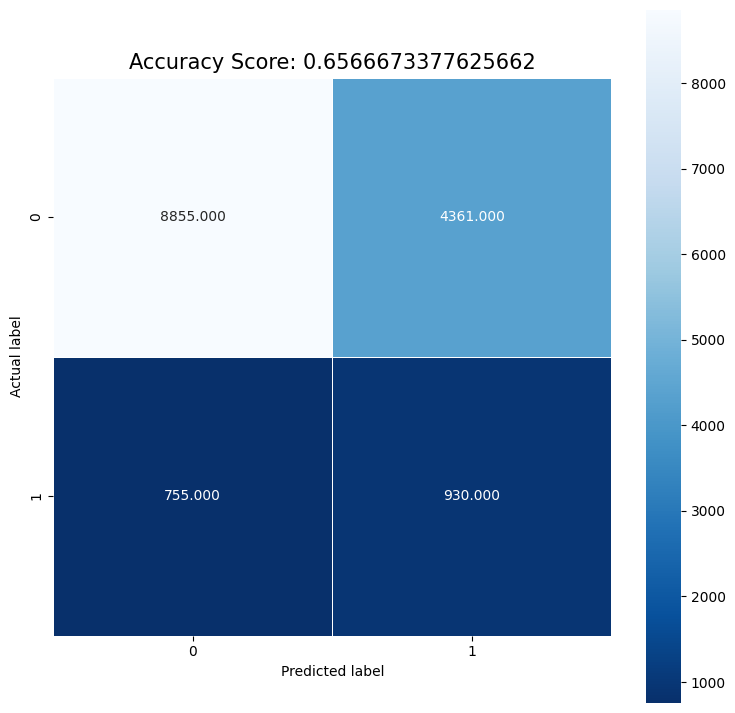

In [85]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_tree), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(tree.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

In [127]:
import graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree
dot_dt_q2 = tree.export_graphviz(dte, out_file="dt_q2.dot", feature_names=X_train_tf.columns, max_depth=2, class_names=["No","Yes"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')
Image(graph_dt_q2.create_png())

NameError: name 'dte' is not defined

# Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)


RandomForestClassifier(max_depth=6, random_state=42)

In [87]:
Y_rf=rf.predict(X_valid_tf)

In [88]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds_rf = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds_rf, thresh)

Random Forest
Training:
AUC:0.693
accuracy:0.639
recall:0.618
precision:0.644
specificity:0.659
prevalence:0.500
 
Validation:
AUC:0.652
accuracy:0.618
recall:0.607
precision:0.169
specificity:0.619
prevalence:0.113
 


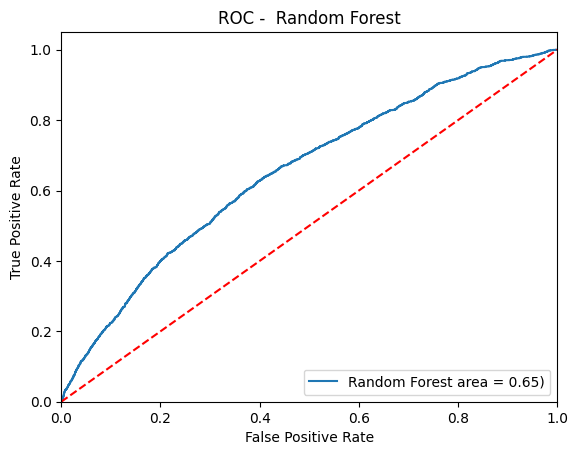

In [89]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_valid, y_valid_preds_rf)
fp_rate, tp_rate, thresholds = roc_curve(y_valid, y_valid_preds_rf)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Random Forest area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC -  Random Forest')
plt.legend(loc="lower right")
plt.show()

In [90]:
print(confusion_matrix(y_valid, Y_rf))

[[8184 5032]
 [ 662 1023]]


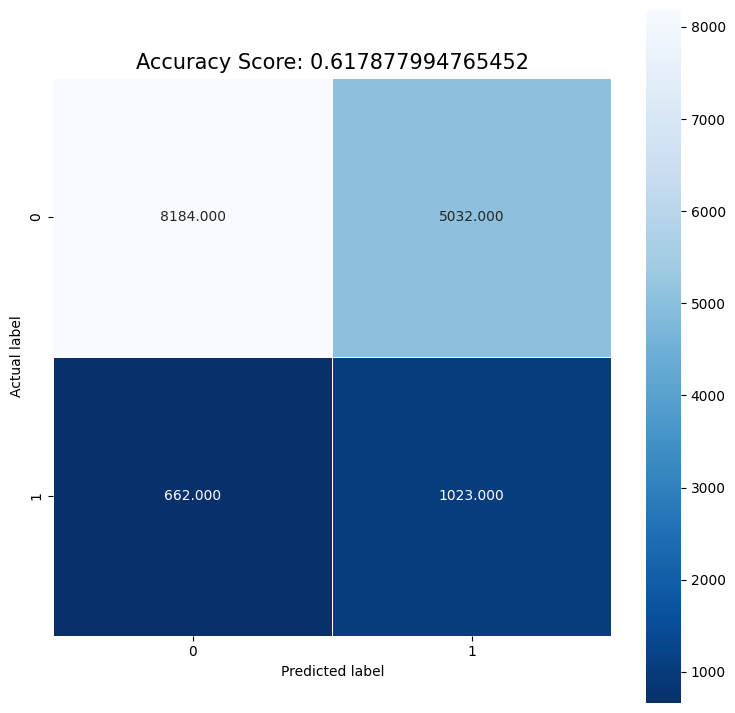

In [91]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_rf), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

## Gradient Boosting Classifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)


GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [93]:
Y_gbc=gbc.predict(X_valid_tf)

In [94]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds_gbc = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds_gbc, thresh)

Gradient Boosting Classifier
Training:
AUC:0.772
accuracy:0.695
recall:0.673
precision:0.704
specificity:0.717
prevalence:0.500
 
Validation:
AUC:0.635
accuracy:0.618
recall:0.594
precision:0.167
specificity:0.621
prevalence:0.113
 


In [95]:
print(confusion_matrix(y_valid, Y_gbc))

[[8211 5005]
 [ 684 1001]]


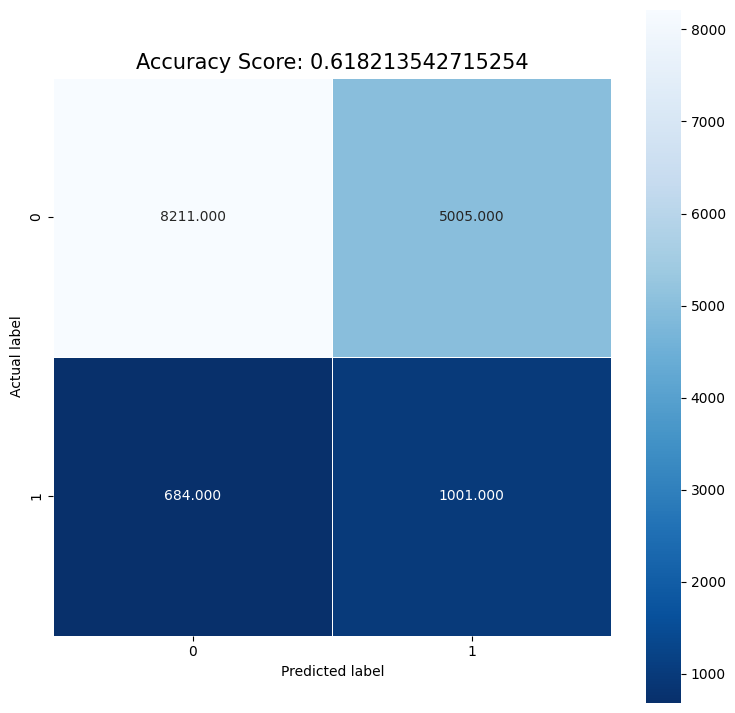

In [96]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_gbc), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(gbc.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

# Adaboost Classifier

In [97]:

#Creating a AdaBoosted Classification model,
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
adaclass.fit(X_train_tf, y_train)


AdaBoostClassifier(learning_rate=0.2, n_estimators=20, random_state=123)

In [98]:
yadaclas = adaclass.predict(X_valid_tf)

In [99]:
#Checking the confusion matrix,
print(confusion_matrix(y_valid, yadaclas))

[[9106 4110]
 [ 780  905]]


In [100]:
y_train_preds = adaclass.predict_proba(X_train_tf)[:,1]
y_valid_preds_adaclass = adaclass.predict_proba(X_valid_tf)[:,1]

print('Adaboost Classifier')
print('Training:')
adaclass_train_auc, adaclass_train_accuracy, adaclass_train_recall, adaclass_train_precision, adaclass_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
adaclass_valid_auc, adaclass_valid_accuracy, adaclass_valid_recall, adaclass_valid_precision, adaclass_valid_specificity = print_report(y_valid,y_valid_preds_adaclass, thresh)

Adaboost Classifier
Training:
AUC:0.656
accuracy:0.610
recall:0.520
precision:0.634
specificity:0.699
prevalence:0.500
 
Validation:
AUC:0.654
accuracy:0.672
recall:0.537
precision:0.180
specificity:0.689
prevalence:0.113
 


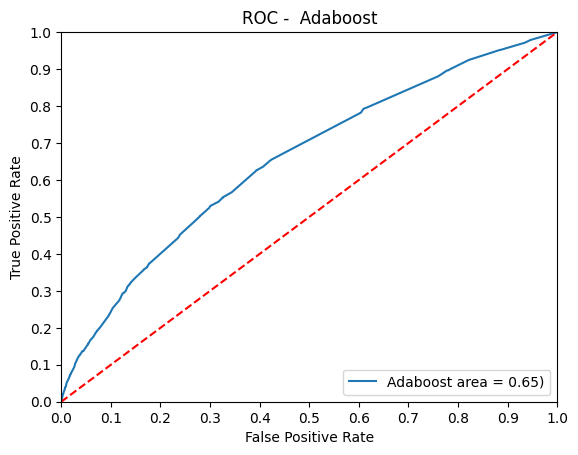

In [101]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_valid, y_valid_preds_adaclass)
fp_rate, tp_rate, thresholds = roc_curve(y_valid, y_valid_preds_adaclass)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Adaboost area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC -  Adaboost')
plt.legend(loc="lower right")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

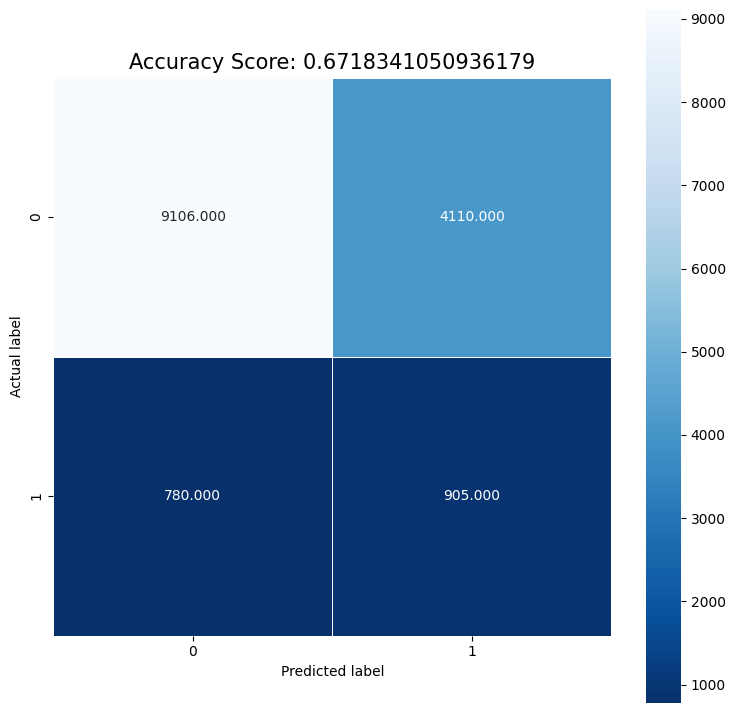

In [102]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid,yadaclas ), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(adaclass.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [104]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','NB','NB','DT','DT','RF','RF','AB','AB','SGDC','SGDC','GBC','GBC'],
                           'data_set':['train','valid']*8,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,adaclass_train_auc,adaclass_valid_auc,sgdc_train_auc,sgdc_valid_auc,gbc_train_auc,gbc_valid_auc],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,adaclass_train_accuracy,adaclass_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,adaclass_train_recall,adaclass_valid_recall,sgdc_train_recall,sgdc_valid_recall,gbc_train_recall,gbc_valid_recall],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,adaclass_train_precision,adaclass_valid_precision,sgdc_train_precision,sgdc_valid_precision,gbc_train_precision,gbc_valid_precision],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,adaclass_train_specificity,adaclass_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,gbc_train_specificity,gbc_valid_specificity]})

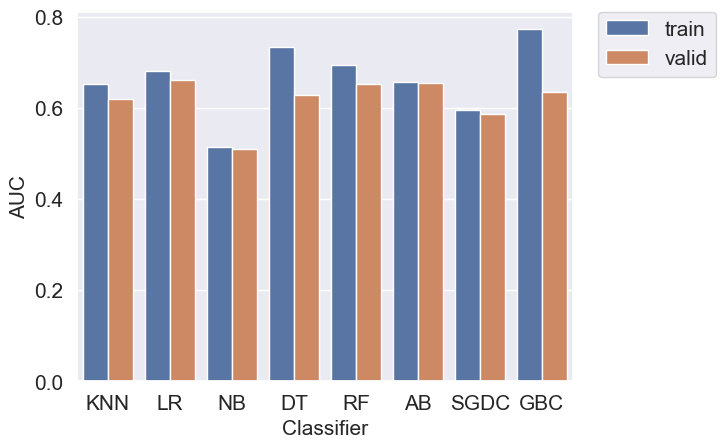

In [105]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

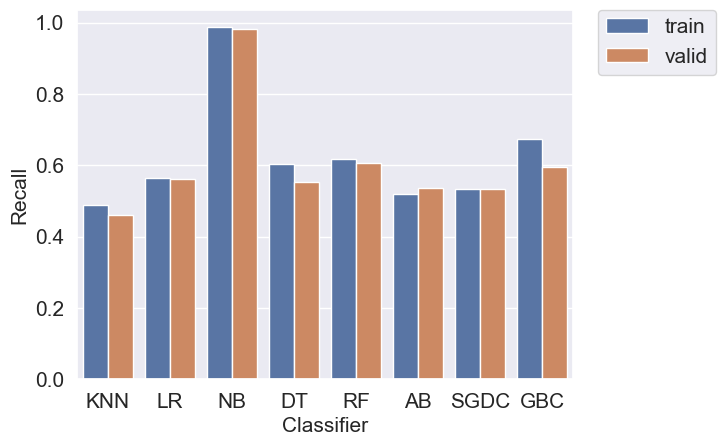

In [106]:
ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
#sns.color_palette()
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('Recall', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

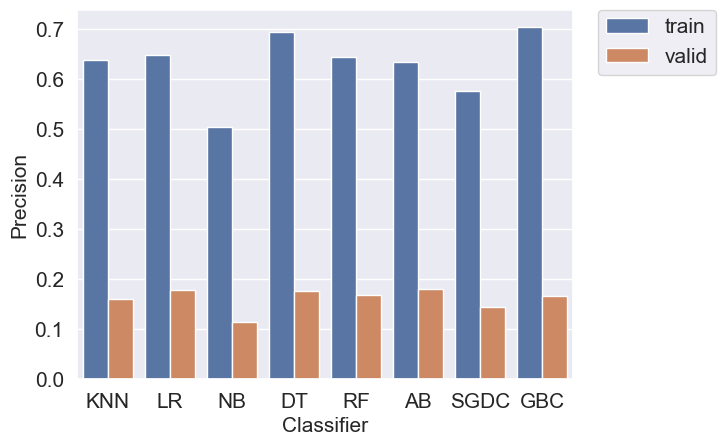

In [107]:
ax = sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
#sns.color_palette()
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('Precision', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

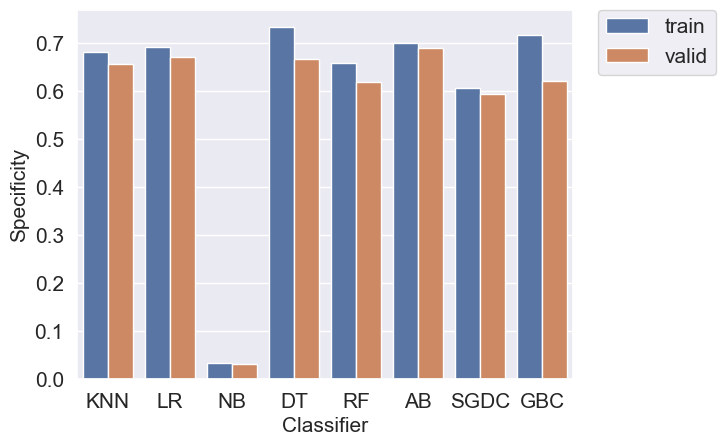

In [108]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
#sns.color_palette()
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('Specificity', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

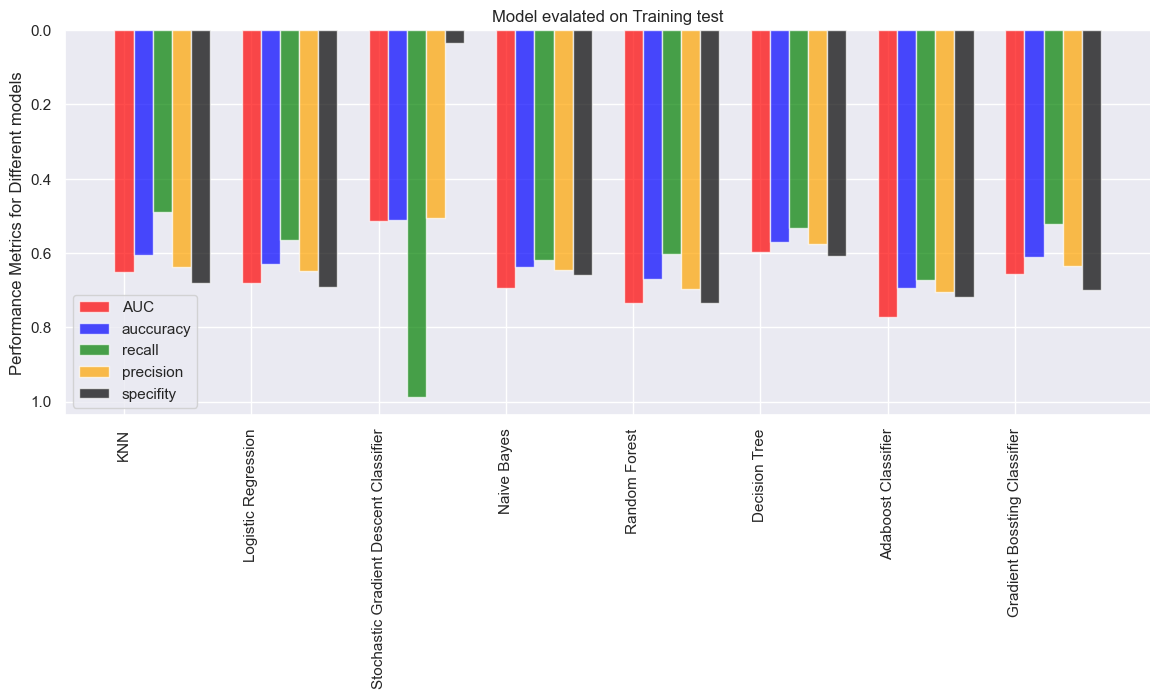

In [109]:
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_train_auc, lr_train_auc, nb_train_auc, rf_train_auc, tree_train_auc,sgdc_train_auc,gbc_train_auc,adaclass_train_auc]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'AUC')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_train_accuracy, lr_train_accuracy, nb_train_accuracy, rf_train_accuracy, tree_train_accuracy,sgdc_train_accuracy,gbc_train_accuracy,adaclass_train_accuracy]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'auccuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_train_recall, lr_train_recall, nb_train_recall, rf_train_recall, tree_train_recall,sgdc_train_recall,gbc_train_recall,adaclass_train_recall]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)




ax = plt.subplot(111)
ax.invert_yaxis()
models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_train_precision, lr_train_precision, nb_train_precision, rf_train_precision, tree_train_precision,sgdc_train_precision,gbc_train_precision,adaclass_train_precision]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'precision')
plt.xticks(model, models,rotation=90)




ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_train_specificity, lr_train_specificity, nb_train_specificity, rf_train_specificity, tree_train_specificity,sgdc_train_specificity,gbc_train_specificity,adaclass_train_specificity]
model = np.arange(len(models))

plt.bar(model+0.60, values, align='center', width = 0.15, alpha=0.7, color = 'black', label = 'specifity')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model evalated on Training test')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

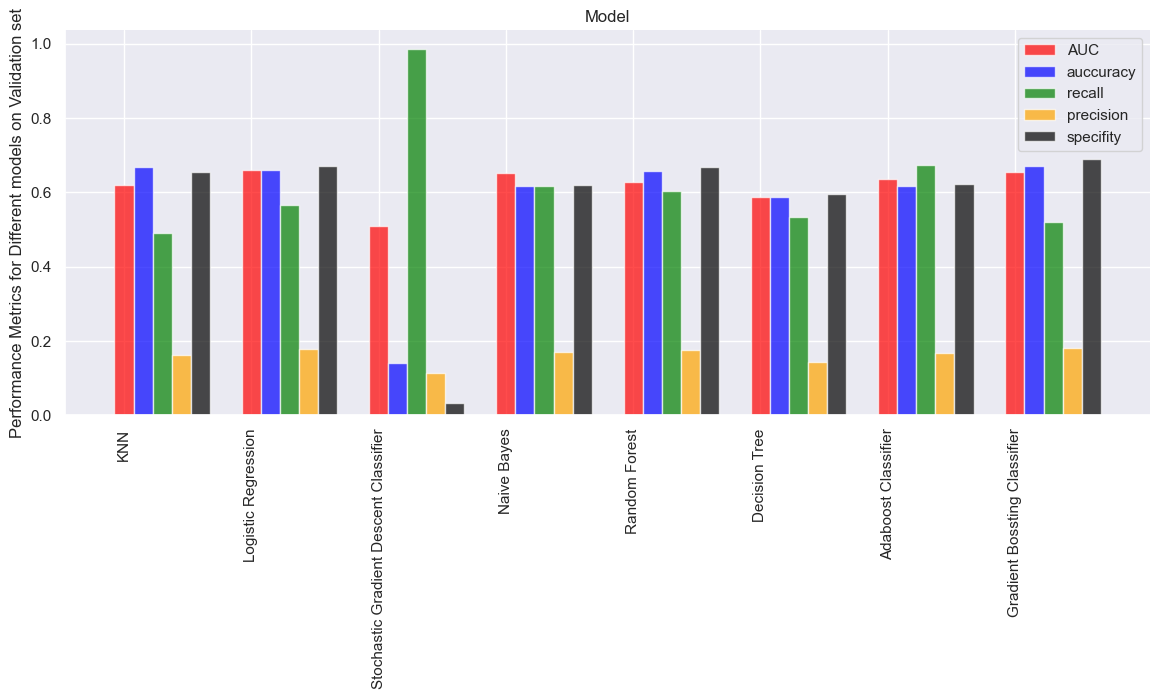

In [110]:
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_valid_auc, lr_valid_auc, nb_valid_auc, rf_valid_auc, tree_valid_auc,sgdc_valid_auc,gbc_valid_auc,adaclass_valid_auc]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'AUC')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_valid_accuracy, lr_valid_accuracy, nb_valid_accuracy, rf_valid_accuracy, tree_valid_accuracy,sgdc_valid_accuracy,gbc_valid_accuracy,adaclass_valid_accuracy]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'auccuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_train_recall, lr_train_recall, nb_train_recall, rf_train_recall, tree_train_recall,sgdc_train_recall,gbc_train_recall,adaclass_train_recall]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)




ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_valid_precision, lr_valid_precision, nb_valid_precision, rf_valid_precision, tree_valid_precision,sgdc_valid_precision,gbc_valid_precision,adaclass_valid_precision]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'precision')
plt.xticks(model, models,rotation=90)




ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_valid_specificity, lr_valid_specificity, nb_valid_specificity, rf_valid_specificity, tree_valid_specificity,sgdc_valid_specificity,gbc_valid_specificity,adaclass_valid_specificity]
model = np.arange(len(models))

plt.bar(model+0.60, values, align='center', width = 0.15, alpha=0.7, color = 'black', label = 'specifity')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models on Validation set')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

In [111]:
fpr_knn, tpr_knn, thresholds = roc_curve(y_valid, y_valid_preds_knn)#knn
fpr_lr, tpr_lr, thresholds = roc_curve(y_valid, y_valid_preds_lr)#logistic regression
fpr_rf, tpr_rf, thresholds = roc_curve(y_valid, y_valid_preds_rf)#random forest classifier
fpr_adaclf, tpr_adaclf, thresholds = roc_curve(y_valid, y_valid_preds_adaclass)#Ada boost classifier
fpr_nb, tpr_nb, thresholds = roc_curve(y_valid,y_valid_preds_nb )#Hyperparameters Tunning for AdaBoosted
fpr_dt, tpr_dt, thresholds = roc_curve(y_valid,y_valid_preds_tree )#decision tree
fpr_sgdc, tpr_sgdc, thresholds = roc_curve(y_valid,y_valid_preds_sgdc )#decision tree
fpr_gbc, tpr_gbc, thresholds = roc_curve(y_valid,y_valid_preds_gbc )#decision tree
roc_auc_rf = roc_auc_score(y_valid, y_valid_preds_rf)
roc_auc_knn = roc_auc_score(y_valid, y_valid_preds_knn)
roc_auc_nb = roc_auc_score(y_valid, y_valid_preds_nb)
roc_auc_tree = roc_auc_score(y_valid, y_valid_preds_tree)
roc_auc_lr = roc_auc_score(y_valid, y_valid_preds_lr)
roc_auc_adaclass = roc_auc_score(y_valid, y_valid_preds_adaclass)
roc_auc_sgdc = roc_auc_score(y_valid, y_valid_preds_sgdc)
roc_auc_gbc = roc_auc_score(y_valid, y_valid_preds_gbc)

Text(0, 0.5, 'True Positive Rate')

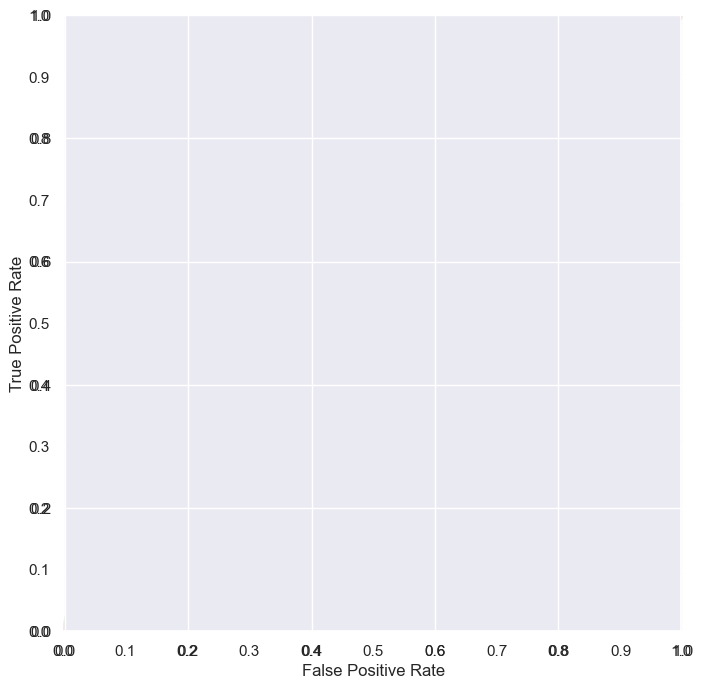

In [112]:

#compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_lr, tpr_lr)
plt.plot(fpr_adaclf, tpr_adaclf)
plt.plot(fpr_nb, tpr_nb)
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_sgdc, tpr_sgdc)
plt.plot(fpr_gbc, tpr_gbc)
#plt.plot(fpr_adamod, tpr_adamod, label='Adaboost with the best Pars')
plt.plot(fpr_dt, tpr_dt)
plt.plot(fpr_adaclf, tpr_adaclf, label='Adaboost area = %0.2f)' % roc_auc_adaclass)
plt.plot(fpr_knn, tpr_knn, label='KNN area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_rf, tpr_rf, label='Random Forest area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_sgdc, tpr_sgdc, label='SGDC area = %0.2f)' % roc_auc_sgdc)
plt.plot(fpr_gbc, tpr_gbc, label='GBC area = %0.2f)' % roc_auc_gbc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
#plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Model Selection: Learning Curve
We can diagnose how our models are doing by plotting a learning curve. In this section, we will make use of the learning curve code from scikit-learn's website with a small change of plotting the AUC instead of accuracy. http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html.

In [113]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

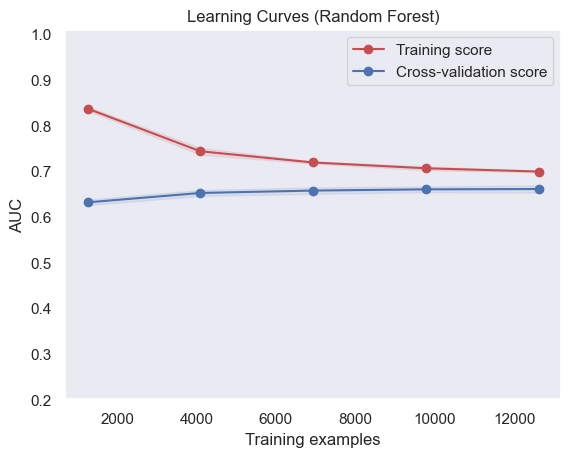

In [114]:
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()


In [115]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=True)

In [116]:
feature_importances.head(10)


,importance
nateglinide_No,-0.333307
nateglinide_Steady,-0.321637
medical_specialty_Family/GeneralPractice,-0.294974
acarbose_Steady,-0.223843
pioglitazone_Steady,-0.212764
acarbose_No,-0.199832
medical_specialty_Gynecology,-0.177447
medical_specialty_ObstetricsandGynecology,-0.147970
pioglitazone_No,-0.147184
medical_specialty_Cardiology,-0.128242


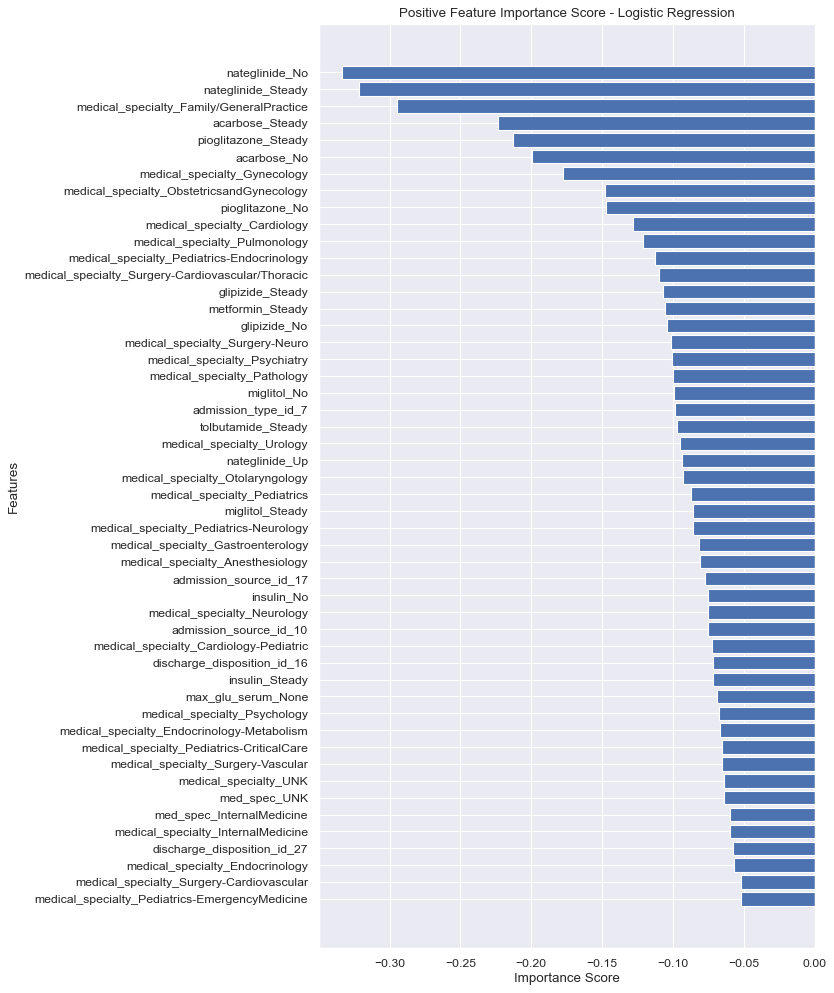

In [117]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

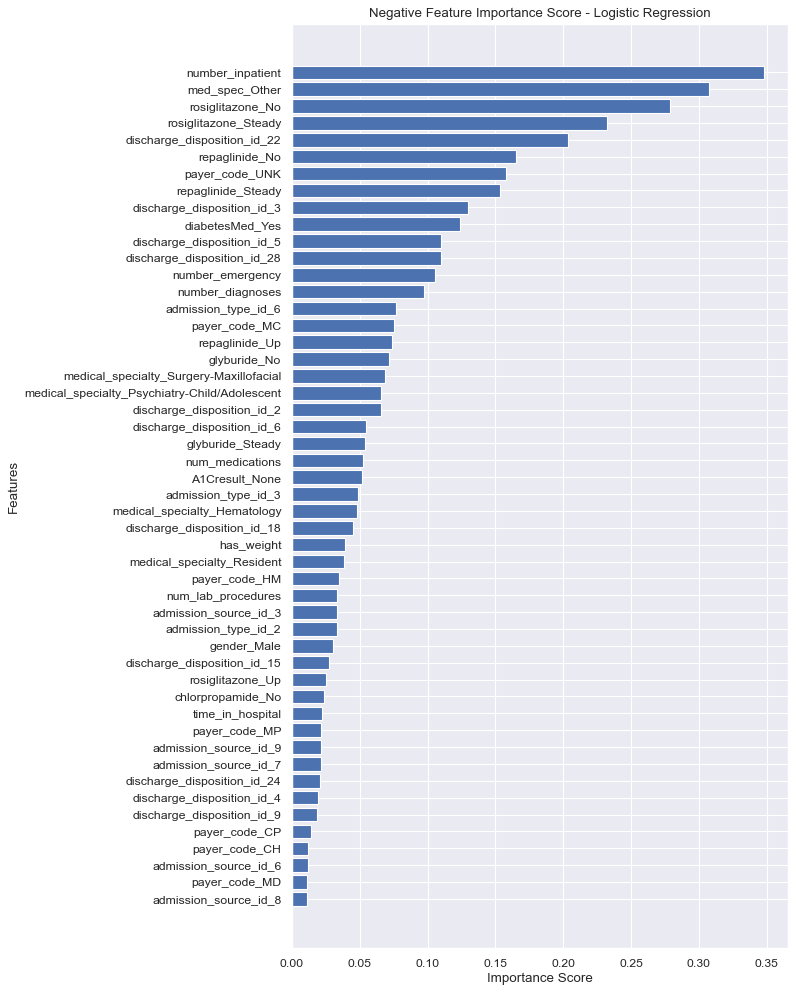

In [118]:

values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In [119]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [120]:
feature_importances.head(10)

,importance
number_inpatient,0.245568
time_in_hospital,0.067432
number_emergency,0.065325
discharge_disposition_id_22,0.064142
num_medications,0.061403
number_diagnoses,0.049655
number_outpatient,0.025520
num_lab_procedures,0.025413
discharge_disposition_id_3,0.024678
insulin_No,0.024233


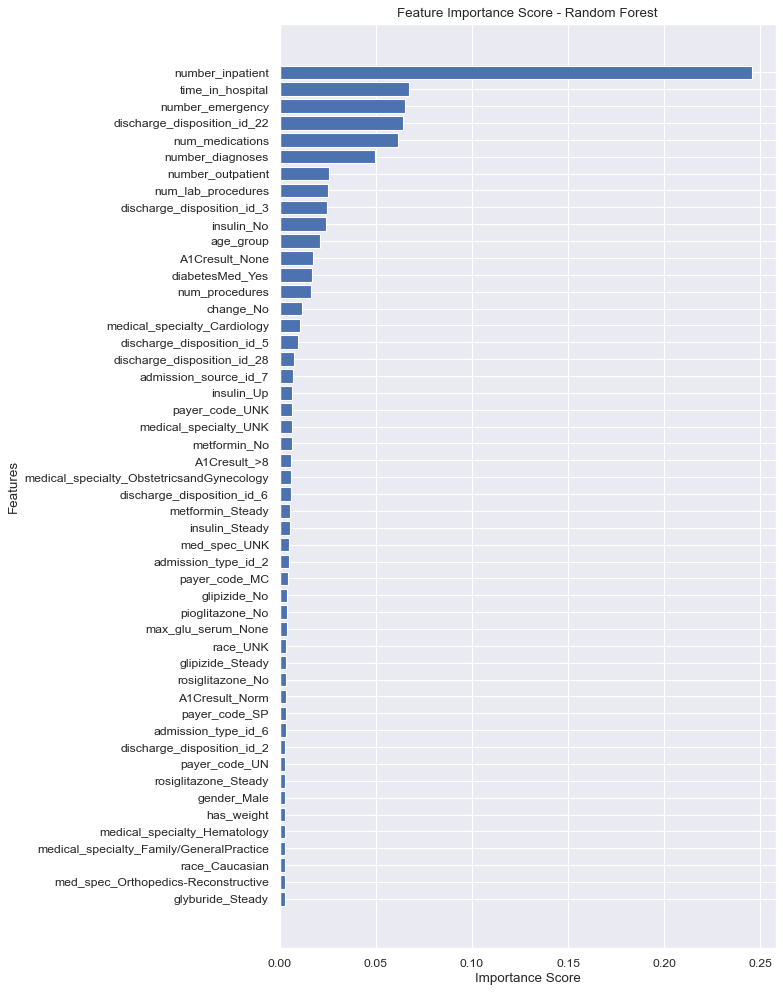

In [121]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

 As you can see here, most of the important variables for random forest are continuous variables. This makes sense since you can split continuous variables more times than categorical variables.

## Feature Importance: Summary
After reviewing these plots, I got inspired to get some new data related to the most important features. For example, in both models the most important feature is number_inpatient, which is the number of inpatient visits in the last year. This means that if patients have been to the hospital in the last year they are more likely to be re-hospitalized again. This might inspire you to get (if you have it) more data about their prior admissions.Another example is discharge_disposition_id_22 which is used if a patient is discharged to a rehab facility. For your company, you might be able to research rules for being discharged to a rehab facility and add features related to those rules. Since most of the data analysts / data scientists won't have the deep domain knowledge. I probably would take a few of these features to other experts (e.g. doctors) and ask them about the medications.

In the case of high variance, one strategy is to reduce the number of variables to minimize overfitting. After this analyis, you could use the top N positive and negative features or the top N important random forest features. You might need to adjust N so that your performance does not drop drastically. For example, only using the top feature will likely drop the performance by a lot. Another strategy that you could use to reduce the number of variables is called PCA (principle component analysis). This is also implemented in scikit-learn if you are interested.

The last thing that I want to mention is that the feature importance plots may also point out errors in your predictive model. Perhaps, you have some data leakage in the cleaning process. Data leakage can be thought of as the process of accidentally including something in the training that allows the machine learning algorithm to artificially cheat. For example, I built a model based on the doctor's discharge notes. When I performed this same analysis on the most important words, I discovered that the top word for predicting someone would not be re-admitted was 'death'. This made me realize that I made a mistake and forgot to exclude patients who expired in the current hospital visit. Learning from my mistakes, I had you exclude the discharge codes related to death. Similar things can also happen when you merge datasets. Perhaps when you merged the datasets one of the classes ended up with nan for some of the variables. The analysis above will help you catch some of these cases.

## Model Selection: Hyperparameter tuning
The next thing that we should investigate is hyperparameter tuning. Hyperparameter tuning are essentially the design decisions that you made when you set up the machine learning model. For example, what is the maximum depth for your random forest? Each of these hyperparameters can be optimized to improve the model.

In this section, we will only optimize the hyper parameters for stochastic gradient descent, random forest and gradient boosting classifier. We will not optimize KNN since it took a while to train. We will not optimize Logistic regression since it performs similarly to stochastic gradient descent. We will not optimize decision trees since they tend to overfit and perform worse that random forests and gradient boosting classifiers.

one technique for hyperparameter tuning is called a Grid search where you test all possible combinations over a grid of values. This is very computationally intensive. The other option is to randomly test a permutation of them. This technique called Random Search is also implemented in scikit-learn. Most of this section is based on this medium blog post (https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)by William Koehrsen. 
we can get a list of the parameters inside a model with get_params. Here are the parameters in the random forest model. Wow there are so many of them!

In [122]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [123]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(1,10,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


To use the RandomizedSearchCV function, we need something to score or evaluate a set of hyperparameters. Here we will use the auc.

In [124]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [125]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 5, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

 Three important parameters of RandomizedSearchCV are

scoring = evaluation metric used to pick the best model
n_iter = number of different combinations
cv = number of cross-validation splits
increasing the last two of these will increase the run-time, but will decrease chance of overfitting. Note that the number of variables and grid size also influences the runtime. Cross-validation is a technique for splitting the data multiple times to get a better estimate of the performance metric. For the purposes of this tutorial, we will restrict to 2 CV to reduce the time.

In [126]:
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

367.54669713974


In [127]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini'}

 Let's analyze the performance of the best model compared to the baseline model.

In [128]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_valid_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:0.693
Validation AUC:0.652
Optimized Random Forest
Training AUC:0.746
Validation AUC:0.663


Optimize stochastic gradient descent

In [129]:
penalty = ['none','l2','l1']
max_iter = range(100,500,100)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, 
                                 n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, 
                                 random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warning

9.809216737747192


c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 893, in fit
    self._validate_params()
  File "c:\Users\kumarth\py_env\sklearn-ml\lib\site-packages\sklearn\base.py", line 570, in _validate_params
    validate_parameter_const

In [130]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 100, 'alpha': 0.1}

In [131]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Baseline sgdc')
sgdc_train_auc_base = roc_auc_score(y_train, y_train_preds)
sgdc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_auc_base))
print('Validation AUC:%.3f'%(sgdc_valid_auc_base))
print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_auc))
print('Validation AUC:%.3f'%(sgdc_valid_auc))

Baseline sgdc
Training AUC:0.596
Validation AUC:0.586
Optimized sgdc
Training AUC:0.679
Validation AUC:0.662


 ## Optimize gradient boosting classifier

In [132]:
# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc,
                                n_iter = 20, cv = 2, scoring=auc_scoring,
                                verbose = 0, random_state = 42)


t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

234.2536141872406


In [133]:
gbc_random.best_params_

{'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.1}

In [134]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Baseline gbc')
gbc_train_auc_base = roc_auc_score(y_train, y_train_preds)
gbc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_auc_base))
print('Validation AUC:%.3f'%(gbc_valid_auc_base))

print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_auc))
print('Validation AUC:%.3f'%(gbc_valid_auc))

Baseline gbc
Training AUC:0.772
Validation AUC:0.635
Optimized gbc
Training AUC:0.691
Validation AUC:0.672


In [135]:

df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['base','optimized']*3,
                          'auc':[sgdc_valid_auc_base,sgdc_valid_auc,
                                 rf_valid_auc_base,rf_valid_auc,
                                 gbc_valid_auc_base,gbc_valid_auc,],
                          })

In [136]:

df_results

,classifier,data_set,auc
0,SGD,base,0.586110
1,SGD,optimized,0.662139
2,RF,base,0.652214
3,RF,optimized,0.663162
4,GB,base,0.634985
5,GB,optimized,0.671841


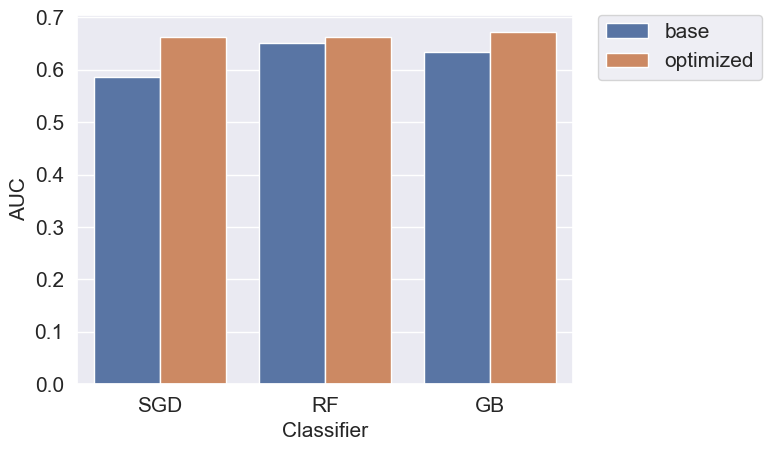

In [137]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()


We can see that the hyperparameter tuning improved the models, but not by much.

## Model Selection: Best Classifier
Here we will chose the gradient boosting classifier since it has the best AUC on the validation set. You won't want to train your best classifier every time you want to run new predictions. Therefore, we need to save the classifier. We will use the package pickle.

In [138]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

## Model Evaluation
Now that we have selected our best model. Let's evaluate the performance of the test set.

In [144]:
X_test = df_test[col2use].values
y_test = df_test['OUTPUT_LABEL'].values

scaler = pickle.load(open('data\scaler.sav', 'rb'))
X_test_tf = scaler.transform(X_test)

In [140]:
best_model = pickle.load(open('best_classifier.pkl','rb'))

In [145]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [146]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.691
accuracy:0.640
recall:0.586
precision:0.657
specificity:0.694
prevalence:0.500
 
Validation:
AUC:0.672
accuracy:0.660
recall:0.583
precision:0.184
specificity:0.670
prevalence:0.113
 
Test:
AUC:0.668
accuracy:0.652
recall:0.582
precision:0.186
specificity:0.661
prevalence:0.117
 


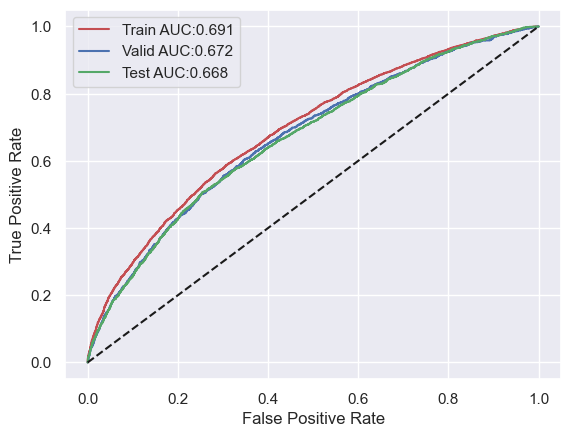

In [147]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion
Through this project, we created a binary classifier to predict the probability that a patient with diabetes would be readmitted to the hospital within 30 days. On held out test data, our best model had an AUC of of 0.67. Using this model, we are able to catch 58% of the readmissions from our model that performs approximately 1.5 times better than randomly selecting patients.